In [164]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import model_from_json
import json
import sys
sys.path.append("../..")
sys.path.append("../../..")
from models.mnist_model.models import EfficientCapsNet

In [165]:
model = EfficientCapsNet('MNIST', mode='test', config_path="../../models/mnist_model/config.json", verbose=False)
model.load_graph_weights()

[ERRROR] Graph Weights not found


In [166]:
path = "mnist_test_data.json"
sorted_data = [] 
with open(path, "r") as f:
    sorted_data = json.load(f)
data = sorted_data

In [167]:
np.array(data).shape

/tmp/ipykernel_26735/2163622617.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(data).shape


(10,)

In [168]:
size_of_data = 500
classes = 10

new_data = np.array([])
ref = np.array([])
for index, item in enumerate(data):
    tmp = np.array(item)
    tmp = tmp[:size_of_data]
    new_data = np.append(new_data, tmp)
    ref = np.append(ref, np.full(size_of_data, index))
data = new_data.reshape(classes, size_of_data, 784)
data.shape

(10, 500, 784)

In [169]:
ref.shape

(5000,)

In [170]:
data = data.reshape(classes*size_of_data, 784)
data.shape

(5000, 784)

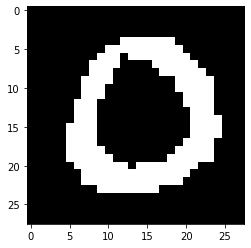

In [180]:
plt.imshow(data[2].reshape(28,28), cmap='gray')

In [171]:
out = model.predict(data.reshape(classes*size_of_data, 28, 28, 1))

In [172]:
out[0].shape

TensorShape([5000, 10])

In [173]:
predicts = []
for i in out[0]:
    predicts.append(np.argmax(i))

In [174]:
predicts = np.array(predicts)
predicts.shape

(5000,)

In [175]:
predicts

array([3, 4, 4, ..., 3, 4, 5])

In [176]:
ref

array([0., 0., 0., ..., 9., 9., 9.])

In [177]:
a = np.sum(predicts == ref)
print(f"Accuracy: {(a/(size_of_data*len(path)))*100}%")

Accuracy: 4.859999999999999%
